<img src="rupixen-Q59HmzK38eQ-unsplash.jpg" alt="Someone is trying to purchase a produce online" width="500"/>

Online shopping decisions rely on how consumers engage with online store content. You work for a new startup company that has just launched a new online shopping website. The marketing team asks you, a new data scientist, to review a dataset of online shoppers' purchasing intentions gathered over the last year. Specifically, the team wants you to generate some insights into customer browsing behaviors in November and December, the busiest months for shoppers. You have decided to identify two groups of customers: those with a low purchase rate and returning customers. After identifying these groups, you want to determine the probability that any of these customers will make a purchase in a new marketing campaign to help gauge potential success for next year's sales.

### Data description:

You are given an `online_shopping_session_data.csv` that contains several columns about each shopping session. Each shopping session corresponded to a single user. 

|Column|Description|
|--------|-----------|
|`SessionID`|unique session ID|
|`Administrative`|number of pages visited related to the customer account|
|`Administrative_Duration`|total amount of time spent (in seconds) on administrative pages|
|`Informational`|number of pages visited related to the website and the company|
|`Informational_Duration`|total amount of time spent (in seconds) on informational pages|
|`ProductRelated`|number of pages visited related to available products|
|`ProductRelated_Duration`|total amount of time spent (in seconds) on product-related pages|
|`BounceRates`|average bounce rate of pages visited by the customer|
|`ExitRates`|average exit rate of pages visited by the customer|
|`PageValues`|average page value of pages visited by the customer|
|`SpecialDay`|closeness of the site visiting time to a specific special day|
|`Weekend`|indicator whether the session is on a weekend|
|`Month`|month of the session date|
|`CustomerType`|customer type|
|`Purchase`|class label whether the customer make a purchase|

In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


shopping_data = pd.read_csv("online_shopping_session_data.csv")
shopping_data.head()


,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
0,1,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
1,2,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,Feb,Returning_Customer,0.0
2,3,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
3,4,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,Feb,Returning_Customer,0.0
4,5,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,Feb,Returning_Customer,0.0


CustomerType
New_Customer          0.273352
Returning_Customer    0.195594
Name: Purchase, dtype: float64
0.24468855792839267
0.3898546003206963
0.36712552534442133
{'pair': ('Administrative_Duration', 'ProductRelated_Duration'), 'correlation': 0.3898546003206963}
Probability of less than 100 sales 0.0987778660962733
Probability of more than 100 sales 0.9012221339037267


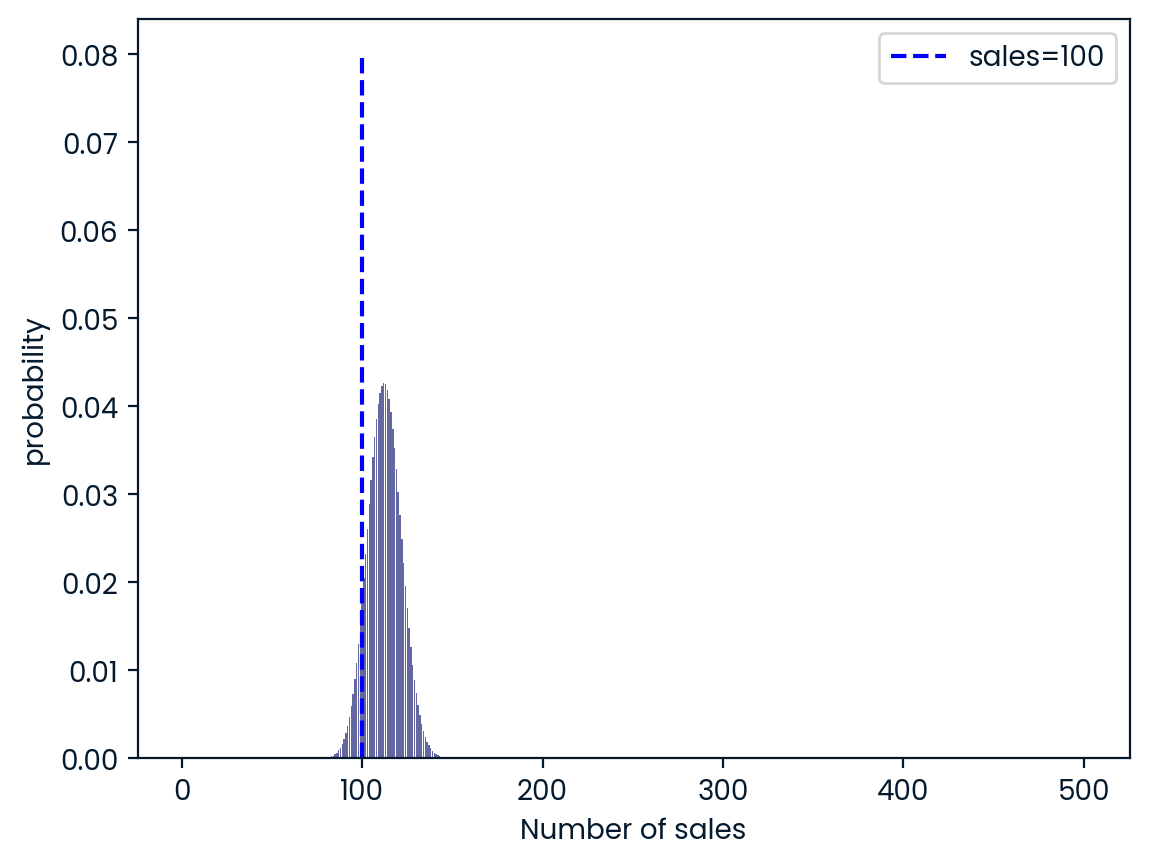

In [16]:

#What are the purchase rates for online shopping sessions by customer type for November and December? 
grouped_nov_dec=shopping_data[shopping_data["Month"].isin(["Nov","Dec"])]
grouped_customer=grouped_nov_dec.groupby("CustomerType")
purchase_rates=grouped_customer["Purchase"].mean()
print(purchase_rates)                                          

purchase_rates = {
    CustomerType: rate
    for CustomerType, rate in purchase_rates.items()
}
#What is the strongest correlation in total time spent among page types by returning customers in November and December?
grouped_by_nov_dec=shopping_data[shopping_data["Month"].isin(["Nov","Dec"])]
correlation_admin_info=grouped_by_nov_dec['Administrative_Duration'].corr(grouped_by_nov_dec["Informational_Duration"])
correlation_admin_product=grouped_by_nov_dec['Administrative_Duration'].corr(grouped_by_nov_dec['ProductRelated_Duration'])
correlation_product_informationt=grouped_by_nov_dec['Informational_Duration'].corr(grouped_by_nov_dec['ProductRelated_Duration'])

print(correlation_admin_info)
print(correlation_admin_product)
print(correlation_product_informationt)
                   
top_correlation={
    "pair":('Administrative_Duration', 'ProductRelated_Duration'),
    "correlation":correlation_admin_product
}
print(top_correlation)

#A new campaign for the returning customers will boost the purchase rate by 15%. What is the likelihood of achieving at least 100 sales out of 500 online shopping sessions for the returning customers? 
purchase_rate_returning = purchase_rates["Returning_Customer"]
increased_purchase_rate=purchase_rate_returning*1.15
likelihood_less_100_purchase=stats.binom.cdf(k=100,n=500,p=increased_purchase_rate)
print("Probability of less than 100 sales",likelihood_less_100_purchase)
prob_at_least_100_sales=1-likelihood_less_100_purchase
print("Probability of more than 100 sales",prob_at_least_100_sales)

# Plotting the probability distribution

k_values=np.arange(500) + 1
n_sessions = 500
p_binom_values = [stats.binom.pmf(k, n_sessions, increased_purchase_rate) for k in k_values ] 
plt.bar(k_values, p_binom_values) 
plt.vlines(100, 0, 0.08, color='b', linestyle='dashed', label="sales=100")
plt.xlabel("Number of sales")
plt.ylabel("probability")
plt.legend()
plt.show()
